In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import cv2


In [2]:
PATH = 'raw_data/archive/'

PATH_IMG = 'raw_data/archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'


In [3]:
df = pd.read_csv(f'{PATH}ISIC_2019_Training_GroundTruth.csv')




In [4]:
df.head()


image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [6]:
def return_image(num_image):
    #fig, ax = plt.subplots(1,5,figsize=(20, 20))
    plt.figure(figsize=(25, 25))
    #plt.subplot(20,6,i+1)
    #image_index = df['image'][4]
    
    
    image_path = f'{PATH_IMG}{num_image}.jpg'
    img = cv2.imread(image_path)[...,[2,1,0]]
        #ax[i].set_title(f'{str(diagnosis)}')
        #ax[i].imshow(img)
    plt.imshow(img)
    plt.show()
    return img


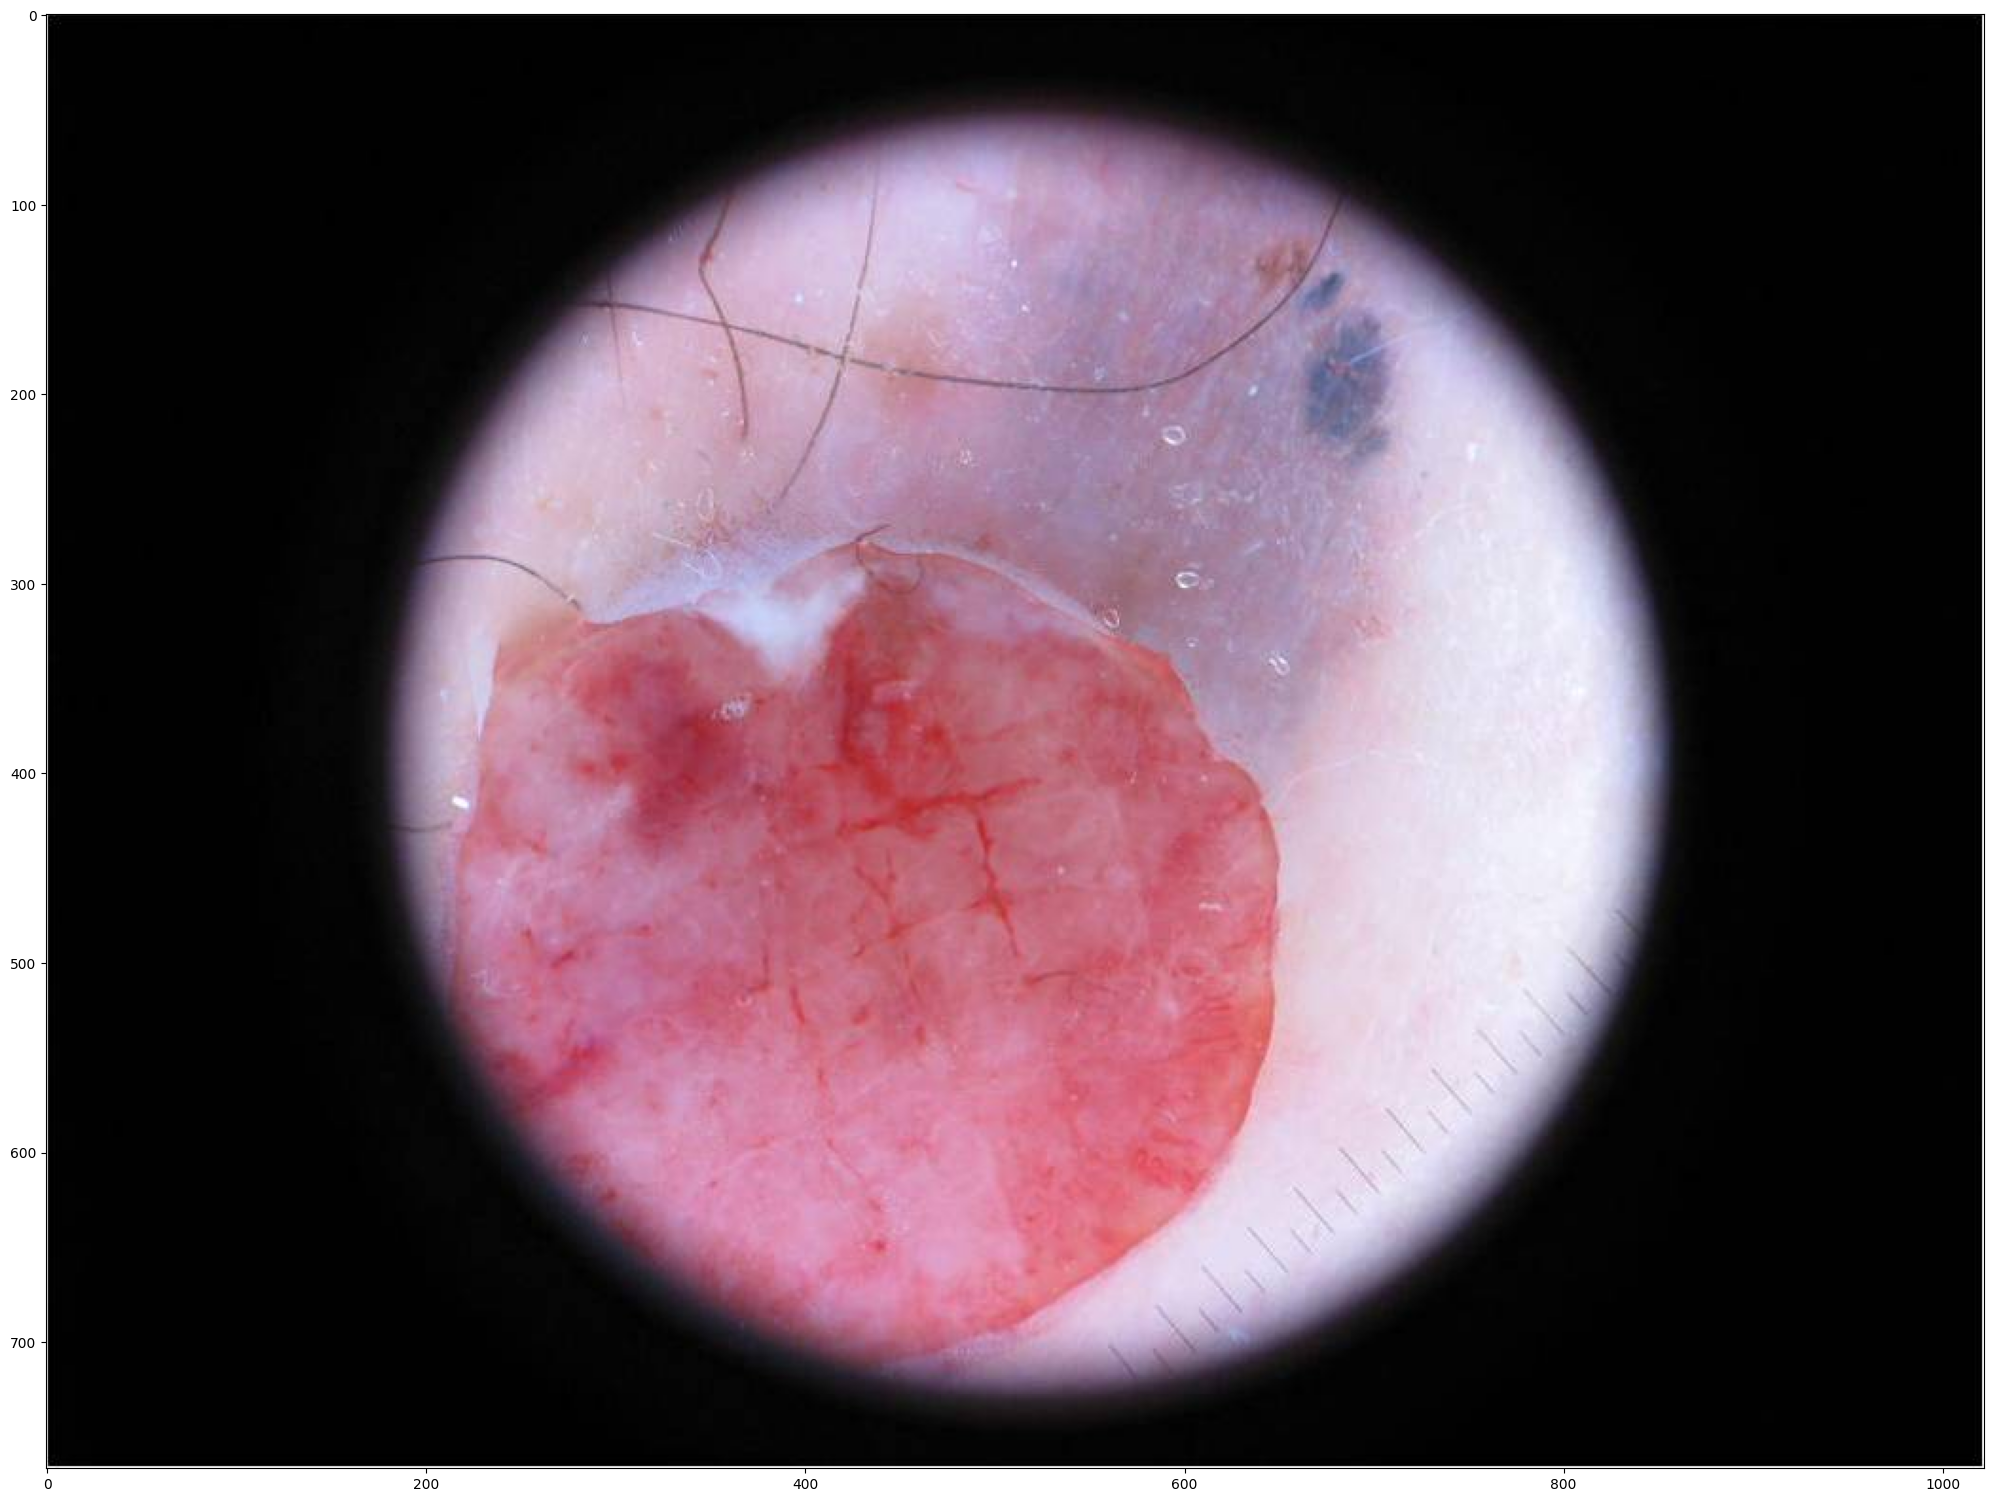

In [7]:
img1= return_image('ISIC_0000004')


In [8]:
img1.shape


(767, 1022, 3)

In [11]:
#img1[2,2:-2,:]



In [12]:
#np.sum(img1[2,2:-2,:]<10)/(len(img1[0])*3)


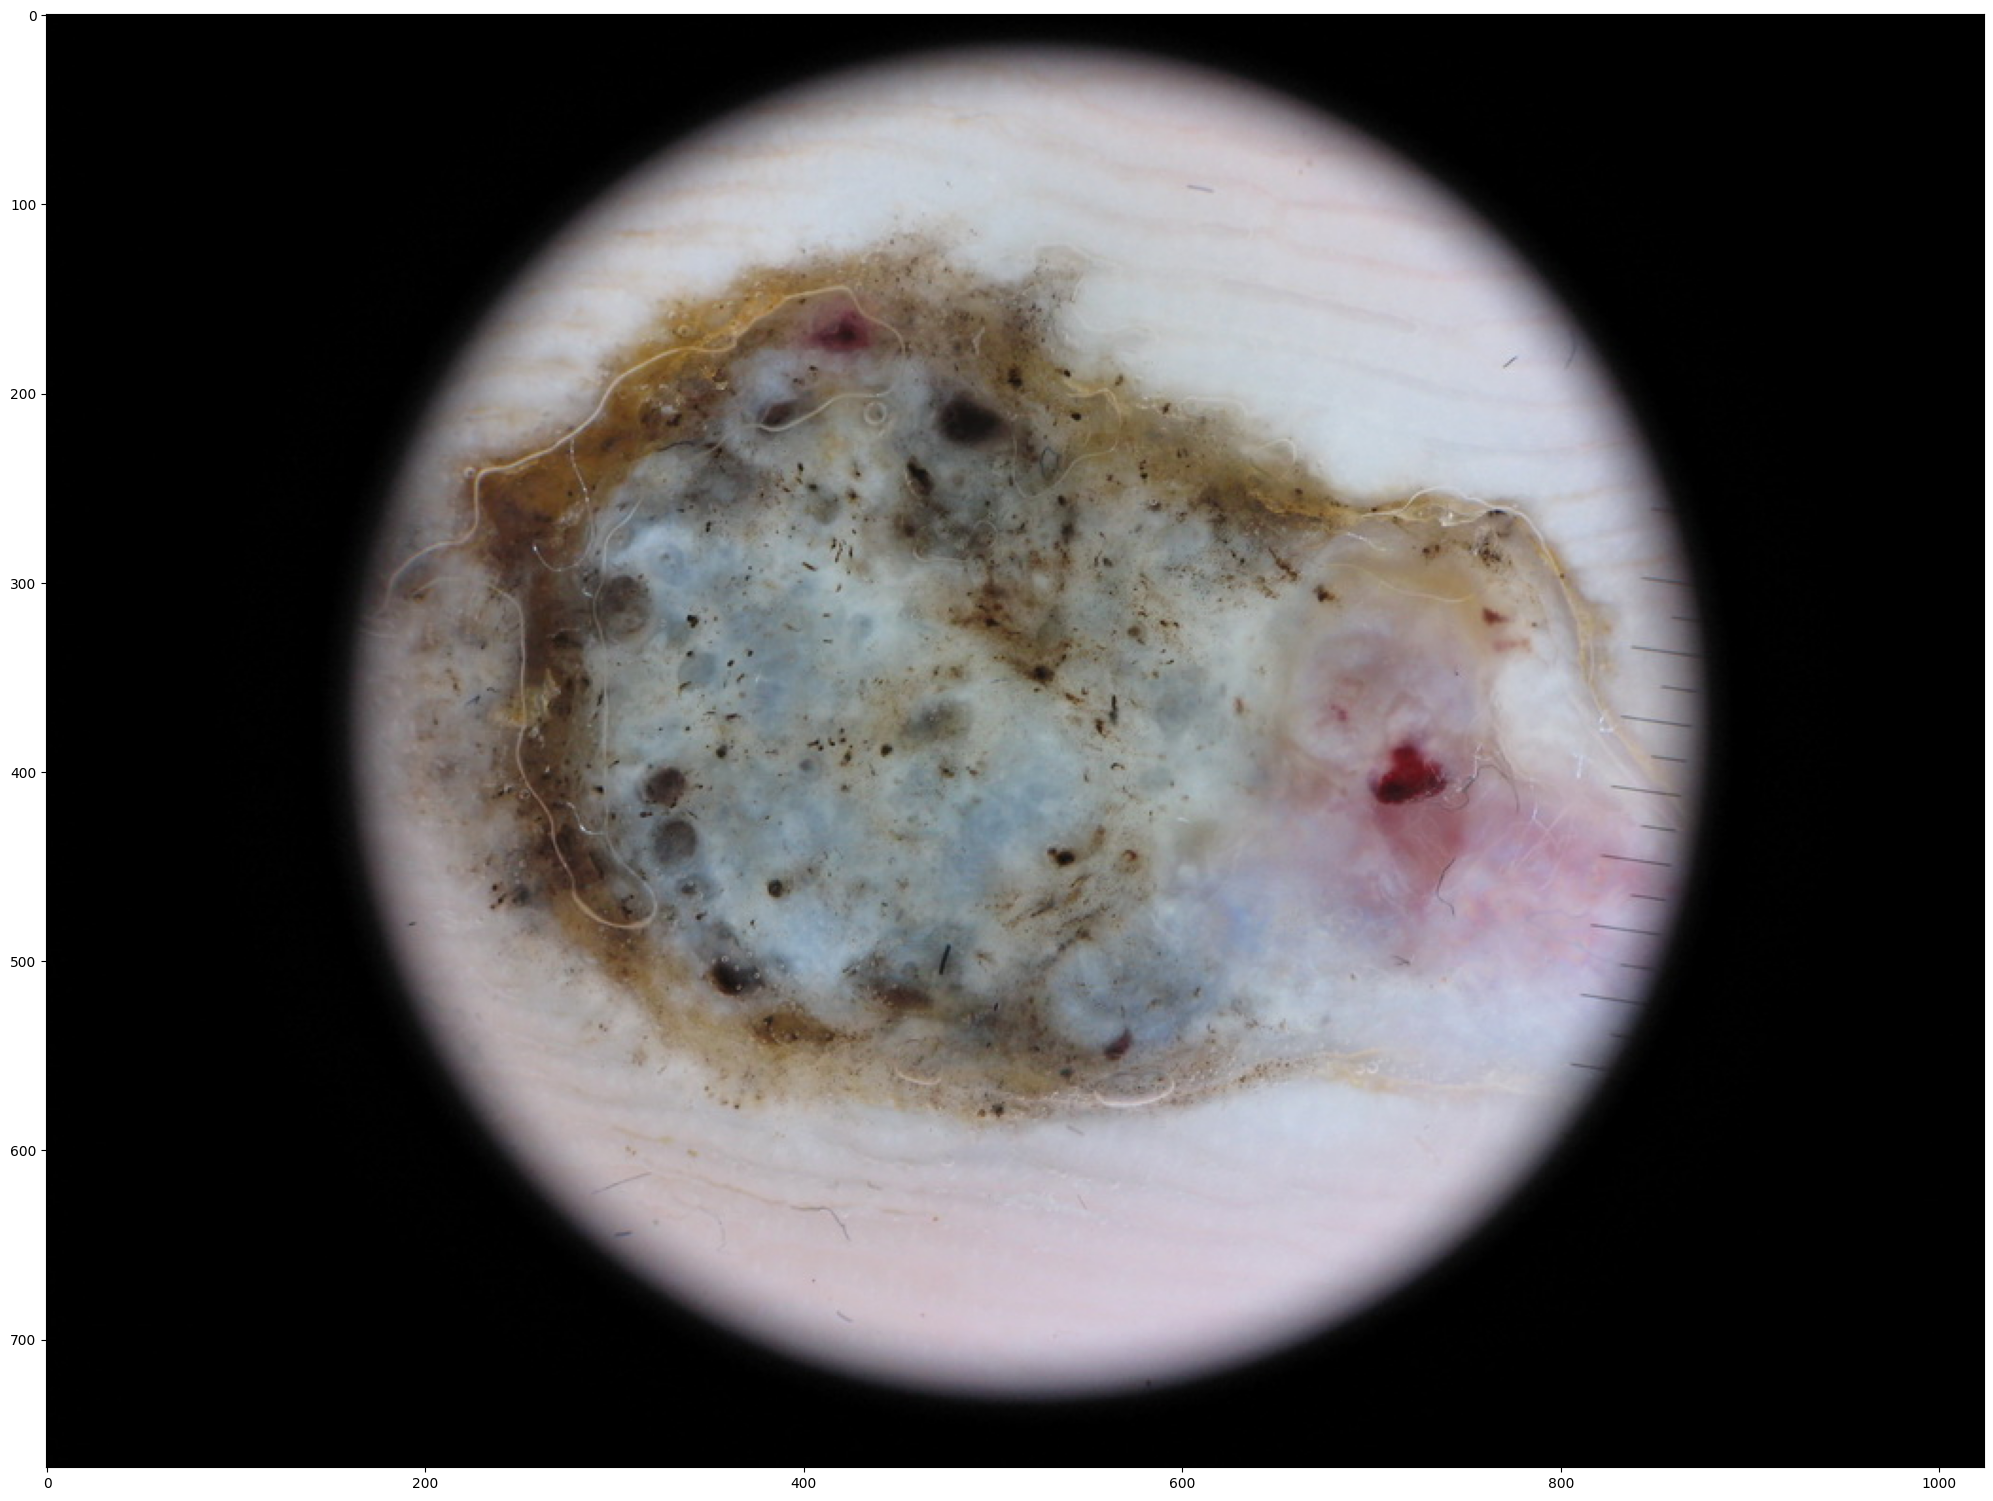

In [13]:
img2= return_image('ISIC_0000290')


In [ ]:
img2.shape

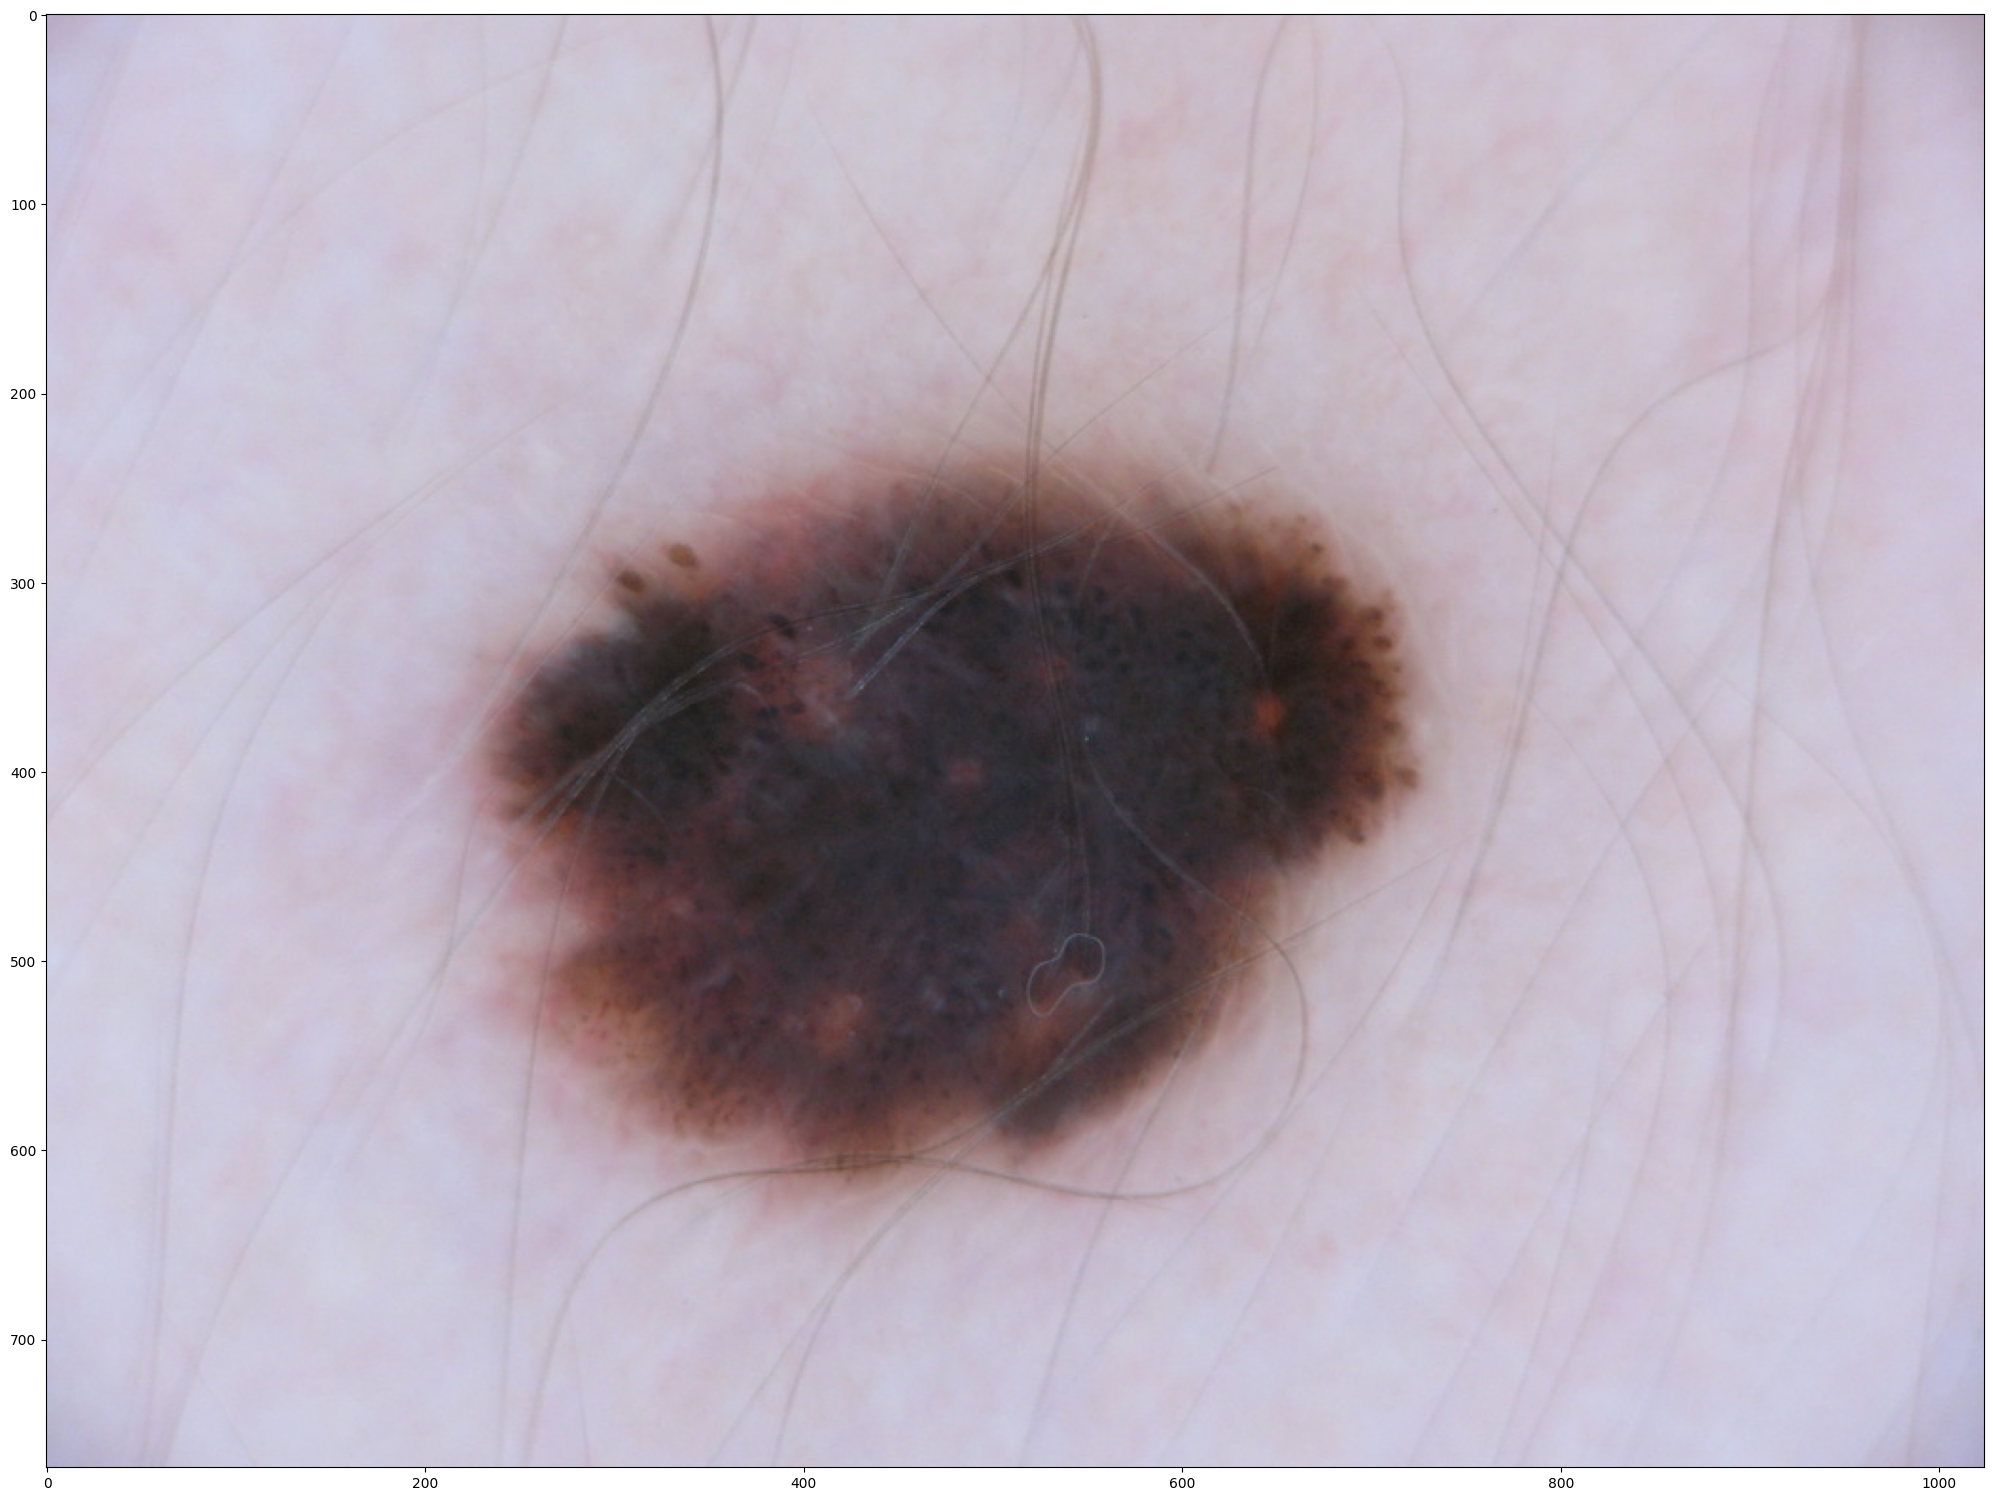

In [14]:
img3=return_image('ISIC_0000271')



In [16]:
#img3[0][0:30]



In [18]:
image2 = cv2.imread('raw_data/archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000290.jpg')




In [22]:
image3 = cv2.imread('raw_data/archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000004.jpg')


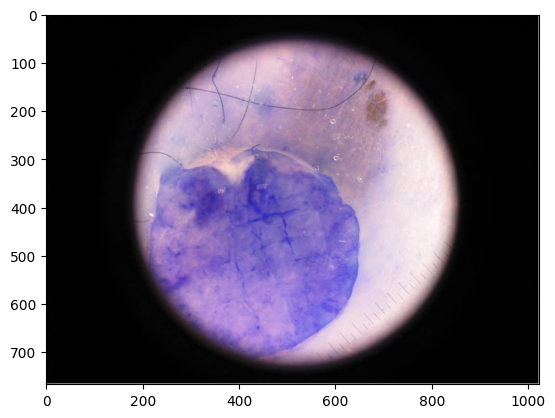

In [108]:
plt.imshow(image3)



In [27]:
image3.shape



(767, 1022, 3)

In [393]:
def is_black(image,start,treshold,percentage):   
    
    
    #treshold = le seuil de noir. Noir absolu = 0 par exemple
    
    #percentage= le pourcentage de la ligne qui est noire
    return  np.sum(image[start,start:-start,:]<treshold)/(len(image[0])*3)>percentage

In [394]:
is_black(img3,2,10,0.95)




False

In [138]:
is_black(image3,2,15,0.97)



True

In [175]:
def create_x0(image,start,treshold,percentage):
    
    y=round(image.shape[0]/2)
    
    for i in range(start,image.shape[1]-start-5):
        
        
        
        if (np.sum(image[y,i:i+5,:]>treshold)/15)>=percentage:
           
                
            return i

In [178]:
create_x0(image3,2,10,0.99)



168

In [186]:
image3.shape


(767, 1022, 3)

In [223]:
def create_x1(image,start,treshold,percentage):
    
    y=round(image.shape[0]/2)
    length=image.shape[1]
    
    for i in range(start,image.shape[1]-start-5):

        if (np.sum(image[y,length-5-i:length-i,:]>treshold)/15)>=percentage:           
            return image.shape[1]-i
        
           
            

In [216]:
create_x1(image3,2,10,0.95)

866

In [143]:
create_x0(img3,2,10,0.95)



2

In [144]:
create_x1(img3,2,10,0.95)



1022

In [136]:
start,treshold,percentage=2,12,0.97



In [147]:
def create_y0(image,start,treshold,percentage):
        
    x=round(image.shape[1]/2)
    
    
    for i in range(start,image.shape[0]-start):      
        if (np.sum(image[i:i+5,x,:]>treshold)/15)>=percentage:                              
            return i

In [156]:
create_y0(image3,start,treshold,percentage)


39

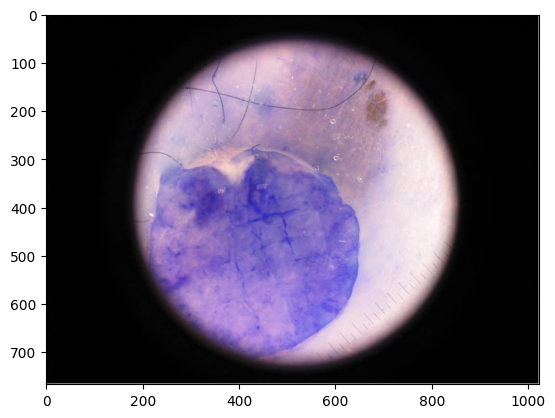

In [187]:
plt.imshow(image3)



In [218]:
def create_y1(image,start,treshold,percentage):
        
    x=round(image.shape[1]/2)
    length=image.shape[0]

    
    for i in range(start,image.shape[0]-start-5):      
        if (np.sum(image[length-5-i:length-i,x,:]>treshold)/15)>=percentage:                              
            return image.shape[0]-i
        

In [222]:
create_y1(image3,start,treshold,percentage)


744

In [233]:
def return_coordinates(image,start,treshold,percentage):
    x0=create_x0(image,start,treshold,percentage)
    x1=create_x1(image,start,treshold,percentage)
    
    y0=create_y0(image,start,treshold,percentage)
    y1=create_y1(image,start,treshold,percentage)
    
    if x0>start and x1<image.shape[1]-start:
        

                return [x0,x1,y0,y1]

In [242]:
coordinates3=return_coordinates(image3,start,treshold,percentage)



In [259]:
coordinates3



[169, 863, 39, 744]

In [260]:
def return_center(coordinates):
    x=round((coordinates[1]+coordinates[0])/2)
    y=round((coordinates[3]+coordinates[2])/2)
    
    return [x,y]

In [262]:
center3=return_center(coordinates3)



In [263]:
center3


[516, 392]

In [370]:
def return_radius(coordinates,center):
    radius1=center[0]-coordinates[0]
    radius2=coordinates[1]-center[0]
    radius3=coordinates[3]-center[1]
    
    radius4=center[1]-coordinates[2]
    
    
    return min([radius1,radius2,radius3,radius4])

In [269]:
return_radius(coordinates3,center3)



353

In [274]:
coordinates3


[169, 863, 39, 744]

39

In [413]:
def crop_square_external(image,start,treshold,percentage):
    
    if is_black(image,start,treshold,percentage):
        coordinates=return_coordinates(image,start,treshold,percentage)
        x0,x1,y0,y1=coordinates
        new_image=image[y0:y1,x0:x1].copy()
    
        return new_image
    else:
        return image
        

In [418]:
image3_square=crop_square_external(image3,start,30,percentage)











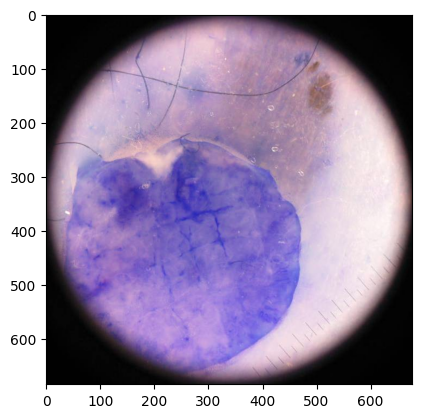

In [419]:
plt.imshow(image3_square)









In [399]:
def crop_square_internal(image,start,treshold,percentage):
    
    if is_black(image,start,treshold,percentage):
        coordinates=return_coordinates(image,start,treshold,percentage)
        center=return_center(coordinates)
        radius=return_radius(coordinates,center)

        c0,c1=center
        
        half_side= (2**0.5)*radius/2
        x0=int(c0-half_side)
        
        x1=int(c0+half_side)
        y0=int(c1-half_side)
        
        y1=int(c1+half_side)
        
        
        new_image=image[y0:y1,x0:x1].copy()
    
        return new_image
    else:
        return image
 

In [358]:
image3_square_internal=crop_square_internal(image3,start,treshold,percentage)




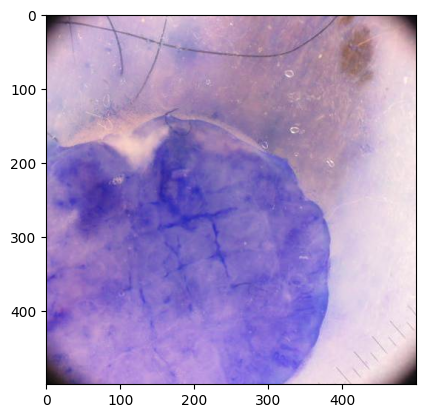

In [359]:
plt.imshow(image3_square_internal)


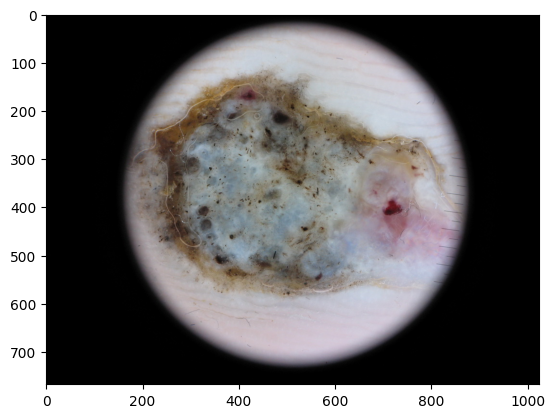

In [360]:
plt.imshow(img2)


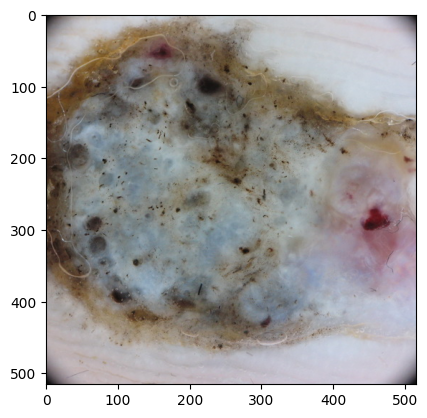

In [361]:
img2_square_internal=crop_square_internal(img2,start,15,percentage)
plt.imshow(img2_square_internal)



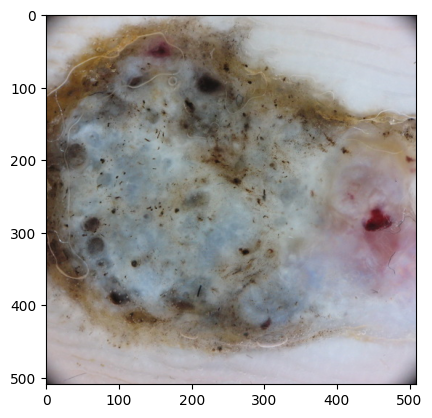

In [408]:
img2_square_internal=crop_square_internal(img2,2,20,0.99)










plt.imshow(img2_square_internal)



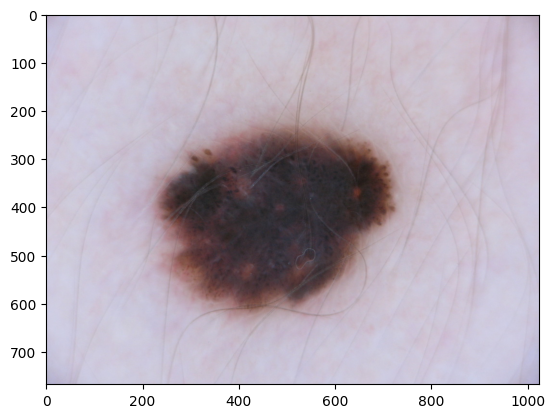

In [400]:
img3_square_internal=crop_square_internal(img3,2,10,0.95)




plt.imshow(img3_square_internal)

